In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
data_d="/oak/stanford/groups/mrivas/projects/biobank-methods-dev/snpnet-SBayesR"


In [3]:
GBE_ID <- 'INI50'

In [7]:
sumstats <- file.path(data_d, 'sumstats_train_val', sprintf('%s.ma', GBE_ID))
sbayesr  <- file.path(data_d, 'SBayesR', sprintf('%s.snpRes', GBE_ID))


In [5]:
sumstats_df <- fread(sumstats)

In [8]:
sbayesr_df <- fread(sbayesr)


In [9]:
sbayesr_df %>% head()

Id,Name,Chrom,Position,A1,A2,A1Frq,A1Effect,SE,PIP,LastSampleEff
<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs116720794,1,729632,T,C,0.036705,-0.007978,0.023310,0.290,0.000000
2,rs3131972,1,752721,G,A,0.843120,0.004491,0.012342,0.252,0.000000
3,rs12184325,1,754105,T,C,0.036618,-0.009922,0.025595,0.277,0.000000
4,rs3131962,1,756604,G,A,0.870207,0.002562,0.009625,0.208,0.004263
5,rs114525117,1,759036,A,G,0.035360,-0.004306,0.015622,0.192,0.000000
6,rs3115850,1,761147,C,T,0.860797,0.007514,0.016983,0.292,0.000000


In [10]:
sumstats_df %>% head()

SNP,A1,A2,freq,b,se,p,N
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
rs116720794,T,C,0.0367049,-0.0899750,0.0477413,0.0594802,257356
rs3131972,G,A,0.8431200,0.0494331,0.0244275,0.0430056,267959
rs12184325,T,C,0.0366177,-0.0996870,0.0467261,0.0328904,269071
rs3131962,G,A,0.8702070,0.0357259,0.0256590,0.1638230,268847
rs114525117,A,G,0.0353601,-0.0732809,0.0480658,0.1273610,262713
rs3115850,C,T,0.8607970,0.0574040,0.0257059,0.0255427,257397


In [11]:
sbayesr_df %>%
left_join(sumstats_df, by=c('Name'='SNP', 'A1'='A1', 'A2'='A2')) -> df

In [12]:
df %>%
ggplot(aes(x=b, y=A1Effect)) +
geom_abline(slope=1, intercept=0, color='gray') +
theme_bw() +
labs(x = 'PLINK 2.0 GWAS effect', y = 'SBayesR effect') +
geom_bin2d(binwidth=c(0.02, 0.005)) -> p


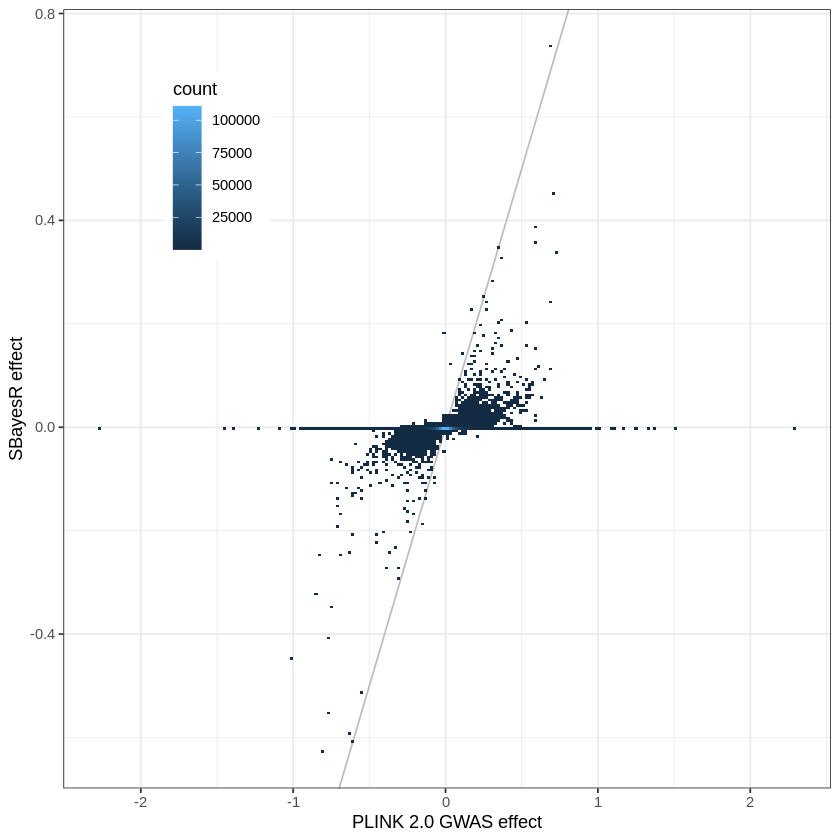

In [13]:
p + theme(legend.position = c(0.2, 0.8))

In [14]:
ggsave('11a_convergence_check.INI50.png', p + theme(legend.position = c(0.2, 0.8)))

Saving 6.67 x 6.67 in image

